### This script shows the **RICE PANICLE IMAGE PROCESSING PIPELINE**.

In [1]:
# Import necessary module
import sys
sys.path.append('..')
from image_processor.RicePanicle import RicePanicle
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Thinning requires a binary image like this

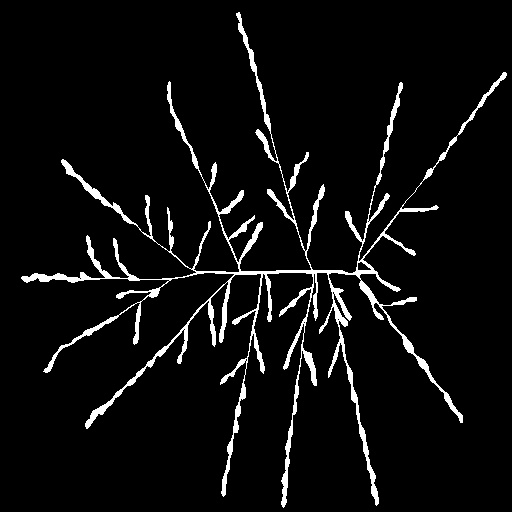

In [2]:
# THINNING
binary_path = "../../crack_segmentation/transfer-learning-results/run_2/DEEPCRACK/13_2_1_1_1_DSC01478.png"
binary_img = cv2.imread(binary_path, cv2.IMREAD_GRAYSCALE)

In [3]:
print(np.unique(binary_img, return_counts=True))

(array([  0, 255], dtype=uint8), array([237930,  24214], dtype=int64))


In [4]:
skeleton_img = RicePanicle.Thinning.zhang_suen(binary_img)

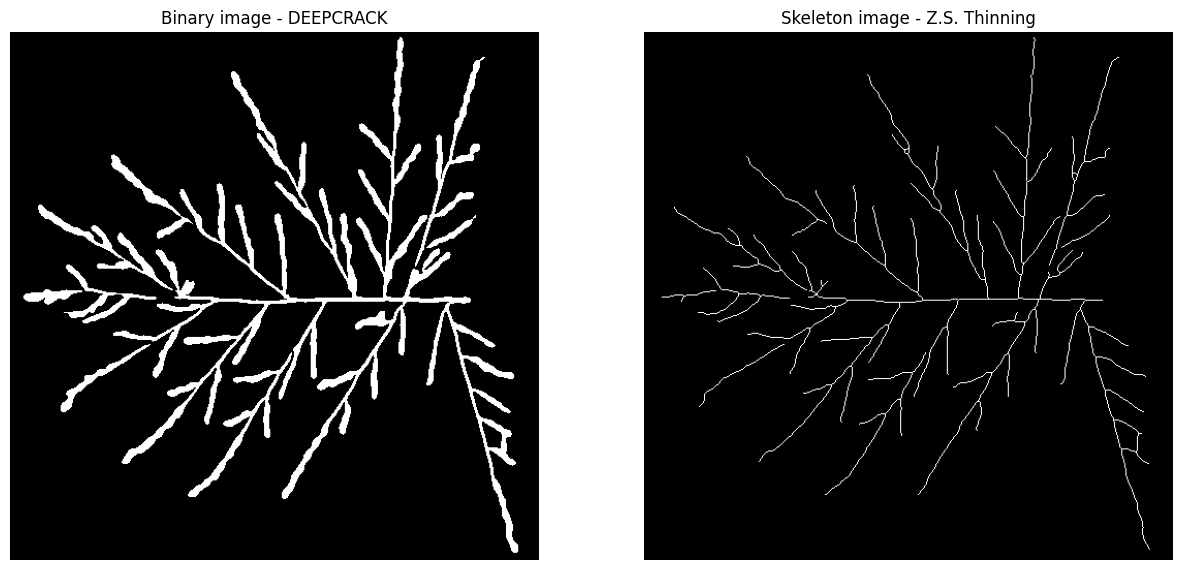

In [5]:
# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

ax1.imshow(binary_img, cmap='gray')
ax1.axis('off')
ax1.set_title("Binary image - DEEPCRACK")

ax2.imshow(skeleton_img, cmap='gray')
ax2.axis('off')
ax2.set_title("Skeleton image - Z.S. Thinning")

plt.show()

In [6]:
# CLUSTERING requires a skeleton image. 
junction_img = RicePanicle.Clustering.crossing_number(skeleton_img)

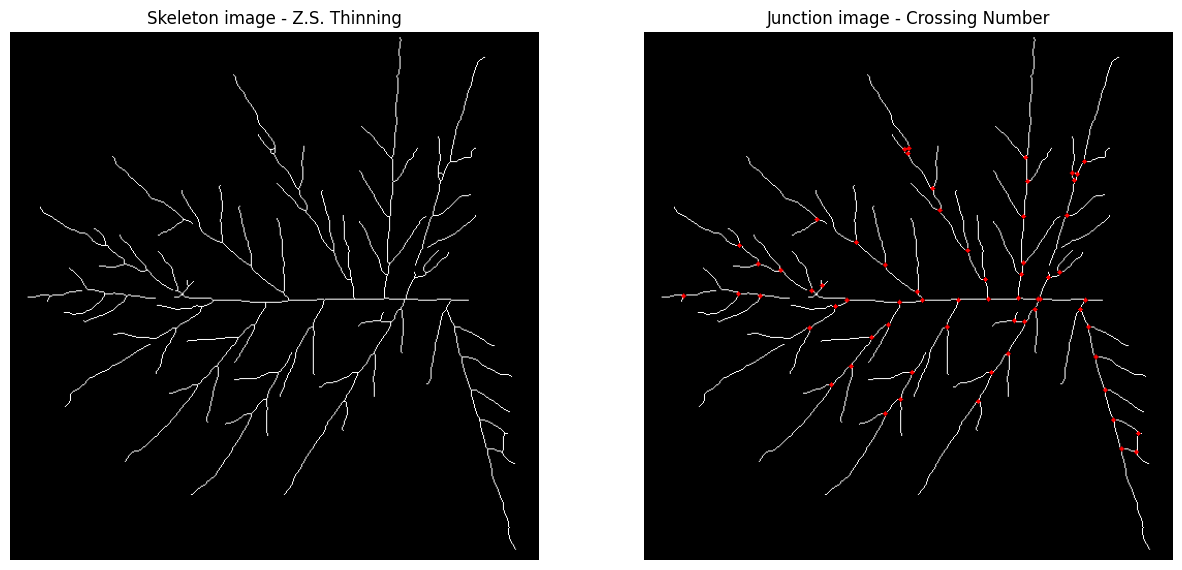

In [7]:
# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

ax1.imshow(skeleton_img, cmap='gray')
ax1.axis('off')
ax1.set_title("Skeleton image - Z.S. Thinning")

ax2.imshow(junction_img, cmap='gray')
ax2.axis('off')
ax2.set_title("Junction image - Crossing Number")

plt.show()

#### EVALUATION requires y_true -> true junction and y_pred -> predicted junction


In [8]:
# First, let's create y_true
from utils.load_ricepr import load_ricepr, resize_xy

ricepr_path = "../../data/original_ricepr/O. sativa/13_2_1_1_1_DSC01478.ricepr"
junction_xy = load_ricepr(ricepr_path)  # original junction coordinates

In [9]:
junction_xy.keys()

dict_keys(['generating', 'end', 'primary', 'secondary', 'tertiary', 'quaternary'])

In [10]:
junction_xy['primary']

[(656, 747),
 (897, 746),
 (1016, 750),
 (1208, 744),
 (1110, 744),
 (558, 736),
 (1266, 752),
 (1281, 747),
 (828, 757)]

In [11]:
# We have to convert in to the size of (512, 512) for consistency
junction_xy_resized = resize_xy(ricepr_path, dst_size=(512, 512))

In [12]:
x_ = []
y_ = []
for key in junction_xy_resized:
    for x, y in junction_xy_resized[key]:
        x_.append(x)
        y_.append(y)

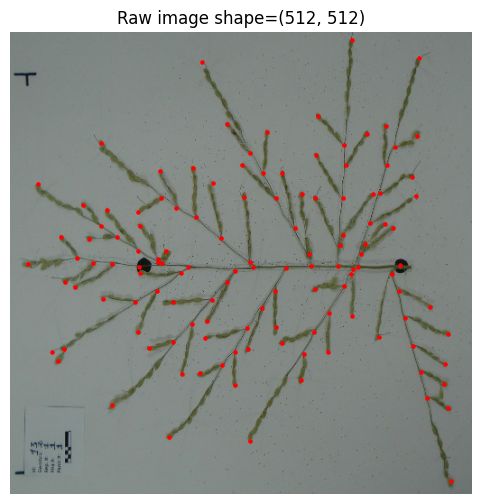

In [13]:
# Visualization
raw_img_512 = plt.imread("../../images/raw_images_512/O. sativa/13_2_1_1_1_DSC01478.jpg")
plt.figure(figsize=(6, 6))
plt.imshow(raw_img_512)
plt.scatter(x_, y_, s=5, c='r')
plt.axis('off')
plt.title("Raw image shape=(512, 512)")
plt.show()

In [15]:
y_true = []
for value in junction_xy_resized.values():
    y_true.extend(value)
print(y_true)

[(432, 258), (143, 260), (216, 339), (224, 167), (144, 267), (141, 332), (240, 101), (180, 299), (61, 277), (113, 413), (153, 350), (416, 104), (322, 385), (172, 242), (218, 320), (166, 153), (176, 448), (485, 416), (265, 453), (402, 179), (72, 282), (455, 376), (56, 227), (257, 147), (338, 284), (144, 214), (249, 391), (107, 197), (259, 182), (263, 351), (485, 334), (339, 136), (395, 112), (408, 338), (103, 295), (87, 229), (338, 183), (488, 497), (210, 377), (100, 123), (284, 110), (415, 212), (202, 150), (80, 191), (341, 93), (190, 378), (465, 304), (46, 354), (482, 367), (453, 28), (30, 168), (212, 33), (378, 8), (352, 354), (323, 179), (450, 115), (424, 217), (301, 344), (445, 160), (53, 364), (481, 390), (449, 181), (378, 314), (301, 156), (294, 326), (20, 257), (141, 199), (197, 260), (269, 260), (305, 261), (363, 259), (333, 259), (168, 256), (380, 262), (385, 260), (249, 264), (189, 267), (233, 228), (240, 277), (417, 147), (100, 215), (59, 351), (410, 178), (353, 311), (446, 

In [ ]:
# Second, let's create y_pred